In [76]:
import numpy as np
import matplotlib.pyplot as plt


P = 9300
P1 = 9300*1.3
P2 = 9300*0.7
c_b = 250
c_a = 245

molecular_w_a = 0.05
molecular_w_b = 0.02
a_in = 8 * 1e-6
V = 120 * 1000
h_op = 8000
k = 0.02

In [77]:
D1 = (P2 - c_b) * h_op * molecular_w_b * V * k * a_in
D2 = a_in * h_op * molecular_w_a

In [78]:
#profit function
def func(Q):
    ans = D1 / (1 + k * V / Q) - c_a * (Q * D2) ** 0.6
    return ans

In [79]:
Q = np.arange(1, 90*1000, 1)
f_Q = func(Q)

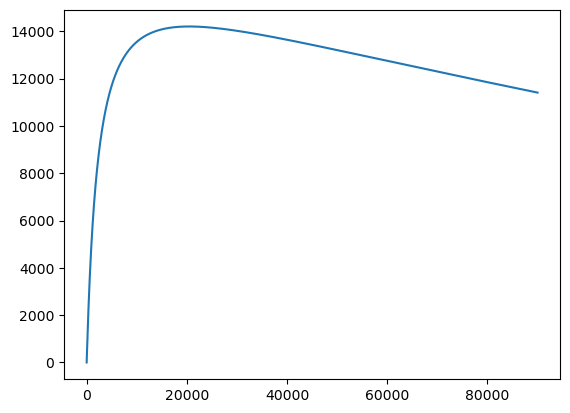

In [80]:
plt.figure(1)
plt.plot(Q, f_Q)
plt.show()

In [81]:
def first_order(Q):
    return (-D1 / (1 + k * V / Q)**2) * (-k * V / (Q**2)) - 0.6 * c_a * (D2 ** 0.6) / (Q ** 0.4)

def second_order(Q):
    return D1 * k * V * ((-2 / ((Q**3)*(1 + k*V / Q)**2)) + 2*k*V / (Q**4 * (1 + k*V/Q)**3)) + 0.6 * c_a * (D2**0.6) * 0.4 / (Q ** 1.4)

In [82]:
#Newton Method
Max_iter = 100
epsilon = 1e-9

x_0 = 10000
x_prev = x_0

for i in range(0, Max_iter):
    x_next = x_prev - first_order(x_prev) / second_order(x_prev)
    if(np.abs(first_order(x_prev)) < epsilon):
        break
    x_prev = x_next
print(x_next)

20460.31398425512


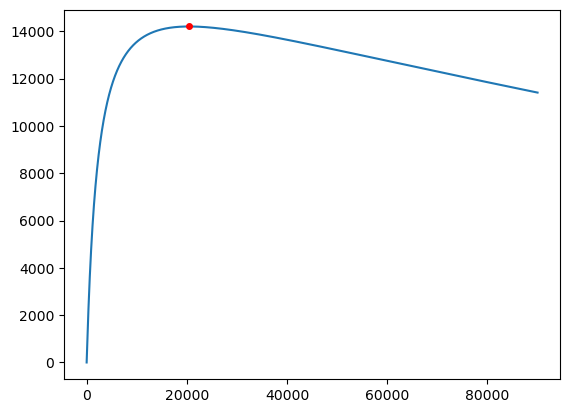

In [83]:
plt.figure(2)
plt.plot(Q, f_Q)
plt.plot(x_next, func(x_next), 'ro', markersize=4)
plt.show()

In [84]:
Q3 = Q
f_Q3 = f_Q


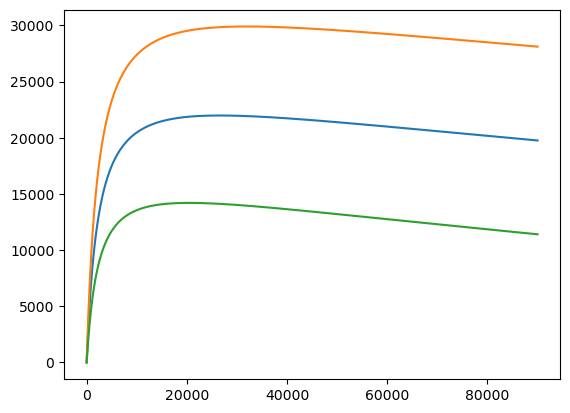

In [85]:
plt.figure(2)
plt.plot(Q1, f_Q1)
plt.plot(Q2, f_Q2)
plt.plot(Q3, f_Q3)
plt.show()

In [86]:
#Golden Section method

r = (np.sqrt(5) - 1) / 2

a = 15000
b = 60000
x1 = (1 - r) * (b - a) + a
x2 = (r) * (b - a) + a
# - 為了找到最大值 因為他是凹口向下的遞增函數
# Golden Section是為了找出最小值
f_x1 = -func(x1)
f_x2 = -func(x2)
tolerance = 1e-9
for i in range(0, 10000):
    if(f_x1 >= f_x2): #把a到x1部分丟掉 因為x1數值比較大 但我們要找最小值 保留x1到b部分 原x2變成新x1 x1變成a
        a = x1
        x1 = x2
        x2 = r * (b - a) + a
        f_x1 = f_x2
        f_x2 = -func(x2)
    else: #丟x2到b部分
        b = x2 #a還是a
        x2 = x1
        x1 = (1 - r) * (b - a) + a
        f_x2 = f_x1
        f_x1 = -func(x1)
    if(np.abs(a - b) < tolerance):
        break

print("最大值出現在(X axis)", (a + b) / 2)
print("最大值為(Y axis)", func((a + b) / 2))

最大值出現在(X axis) 20460.314169881385
最大值為(Y axis) 14200.131789905983
